In [8]:
def split_text(text, max_length=200):
    words = text.split()
    current_chunk = []
    chunks = []
    current_length = 0
    
    for word in words:
        if current_length + len(word) + len(current_chunk) > max_length:
            chunks.append(' '.join(current_chunk))
            current_chunk = [word]
            current_length = len(word)
        else:
            current_chunk.append(word)
            current_length += len(word)
    
    # Add the last chunk
    if current_chunk:
        chunks.append(' '.join(current_chunk))
    
    return chunks

# Example usage
text = "This is an example text that we will use to demonstrate the functionality of our text splitting function. It is designed to split the text into chunks of no more than 200 characters each, ensuring that the splits occur at word boundaries to maintain readability."
result = split_text(text)
for i, chunk in enumerate(result):
    print(f"Chunk {i+1}:\n{chunk}\n")


Chunk 1:
This is an example text that we will use to demonstrate the functionality of our text splitting function. It is designed to split the text into chunks of no more than 200 characters each, ensuring

Chunk 2:
that the splits occur at word boundaries to maintain readability.



In [9]:
#load numpy 
import numpy as np

wav = np.load('out.npy')
print(wav)

[ 4.28825791e-04 -2.72323727e-04  6.41555289e-06 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


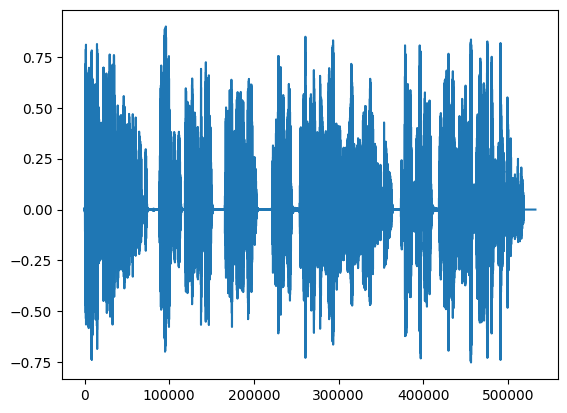

In [10]:
import matplotlib.pyplot as plt
plt.plot(wav)
plt.show()

In [11]:
from IPython.display import Audio

wav = np.concatenate((wav, wav), axis=None)

Audio(wav, rate=22100)



In [15]:
import numpy as np
import io
import lameenc
from pydub import AudioSegment
from IPython.display import Audio


def encode_wav_to_mp3(wav_data_array, sample_rate=24000):

    def float32_to_pcm16(float32_array):
        """
        Convert numpy array of float32 to PCM 16-bit format.
        """
        # Ensure the array is within the correct range
        float32_array = np.clip(float32_array, -1.0, 1.0)
        # Convert to PCM 16-bit
        int16_array = (float32_array * 32767).astype(np.int16)
        return int16_array

    # Convert the float32 array to PCM 16-bit format
    pcm16_array = float32_to_pcm16(wav_data_array)
    
    # Convert the PCM 16-bit array to bytes
    wav_data = pcm16_array.tobytes()
    
    # Initialize the MP3 encoder
    encoder = lameenc.Encoder()
    encoder.set_bit_rate(128)
    encoder.set_in_sample_rate(sample_rate)
    encoder.set_channels(1 if len(wav_data_array.shape) == 1 else wav_data_array.shape[1])
    encoder.set_quality(2)  # 2-highest, 7-fastest

    # Encode the WAV data to MP3
    mp3_data = encoder.encode(wav_data)
    mp3_data += encoder.flush()

    return mp3_data

def play_mp3(mp3_data):
    # Decode MP3 to WAV
    mp3_audio = AudioSegment.from_file(io.BytesIO(mp3_data), format="mp3")
    
    # Convert to bytes
    wav_io = io.BytesIO()
    mp3_audio.export(wav_io, format="wav")
    
    # Use IPython.display.Audio to play the audio
    wav_io.seek(0)
    return Audio(wav_io.read(), rate=mp3_audio.frame_rate)

# Encode the WAV data to MP3
mp3_data = encode_wav_to_mp3(wav)

# Play the MP3 audio
play_mp3(mp3_data)
